In [4]:
import numpy as np
import matplotlib.pyplot as plt

#COPIED MYGAUSS SOLUTION FROM BLACKBOARD
def MyGauss(A,b):
    
    # number of equations
    n = len(b)
    
    # eliminate the unknowns, from first to (n-1)th unknown, to form an upper triangular matrix
    for i in range(0,n-1):
        # eliminate the i-th unknown from the (i+1)th row downwards
        # i.e. set the zeros in column i.
        for j in range(i+1,n):
            # eliminate on row j

            # A(i,i) is the pivot coefficient
            p = A[j,i] / A[i,i]
        
            # compute the new elements of row j in matrix A
            # use slicing
            #A[j,:] = A[j,:] - p * A[i,:]
            # or, alternatively, loop for every cell of row j
            #for k in range(i,n):
            #    A[j,k] = A[j,k] - p * A[i,k]
            A[j,:] = A[j,:] - p * A[i,:]

            # compute the new element of row j in vector b
            b[j] = b[j] - p * b[i]
    
    # evauate, by back substitution the solution
    # start from the last unknown and go upward till the first unknown
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        # contribution from b (right hand side of the equation)
        x[i] = b[i] / A[i,i]
        # contribution from the other (already evaluated) unknowns
        # (within the left hand side of the equation)
        for k in range(i+1,n):
            x[i] = x[i] - A[i,k] * x[k] / A[i,i]

    return x   

## ODE SOLVER FOR 2 DIRECHLET BOUNDARY CONDITIONS

In [5]:
def myodebc(a, b, ya, yb, N):
    
    x = np.linspace(a,b,N+1)
    
    #create matrics: Ay = p
    A = np.zeros((N+1, N+1))
    b = np.zeros(N+1)
    
    #input boundary conditions into matrices
    A[0,0] = 1
    b[0] = ya
    A[N,N] = 1
    b[N] = yb
    
    for i in range(1,N):
        
        h = x[i] - x[i-1]
        
        A[i,i-1] = (1/(h**2)) - (f(x[i]))/(2*h)
        A[i,i] = (g(x[i]) - (2/(h**2)))
        A[i,i+1] = (1/(h**2)) + ((f(x[i]))/(2*h))
        b[i] = p(x[i])
        
    y = MyGauss(A,b)
    
    return (x,y)

In [6]:
def f(x):
    return 2*x

def g(x):
    return 2

def p(x):
    return np.cos(3*x)

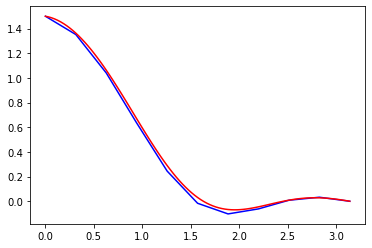

In [7]:
(x10,y10) = myodebc(0,np.pi,1.5,0,10)
(x100,y100) = myodebc(0,np.pi,1.5,0,100)

import matplotlib.pyplot as plt
plt.plot(x10,y10,'b')
plt.plot(x100,y100,'r');

## Jacobi Method

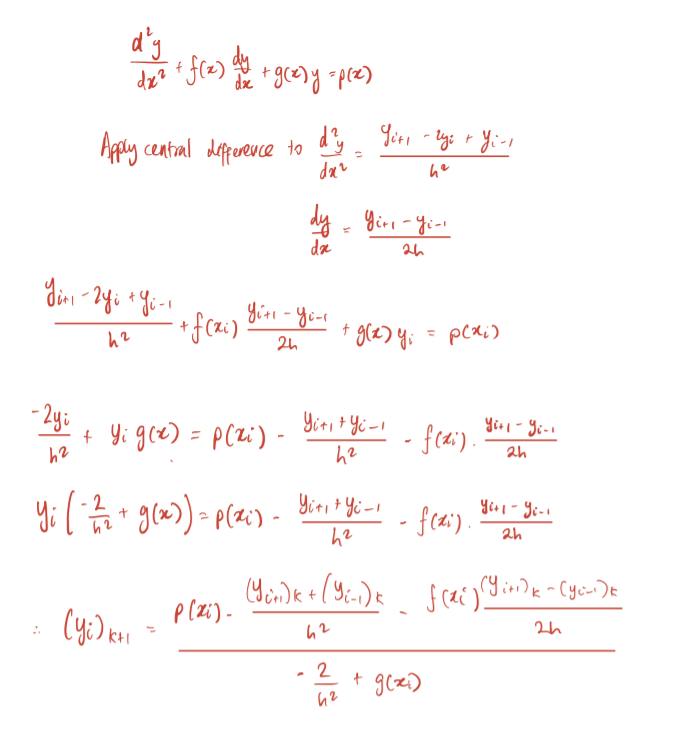

In [8]:
def Jacobi(a,b,ya,yb,N,tol):
    
    x = np.linspace(a,b,N+1)
    
    #create matrics: Ay = p
    b = np.zeros(N+1)
    yk_next = np.zeros(N+1)
    yk = np.zeros(N+1)
    
    #set random error to intitalise the loop
    error = tol*5
    while error > tol:
        
        yk_next[0] = ya
        yk_next[N] = yb 
        
        for i in range(1,N):

            h = x[i] - x[i-1]
            yk_next[i] = (p(x[i]) - ((yk[i+1]+yk[i-1])/h**2) - (f(x[i])*(yk[i+1])-yk[i-1])/(2*h))/((-2/(h**2))+g(x[i]))
            
        error = np.max(np.abs(yk_next - yk))
        yk = np.copy(yk_next)
            
    return (x,yk_next)

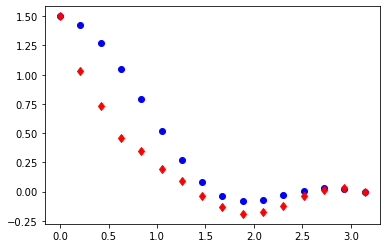

In [9]:
(x,y) = myodebc(0,np.pi,1.5,0,15)
plt.plot(x,y,'bo')
(x,yk_next) = Jacobi(0,np.pi,1.5,0,15, 0.1)
plt.plot(x,yk_next,'rd');

# DYNAMIC ODE SOLVER 

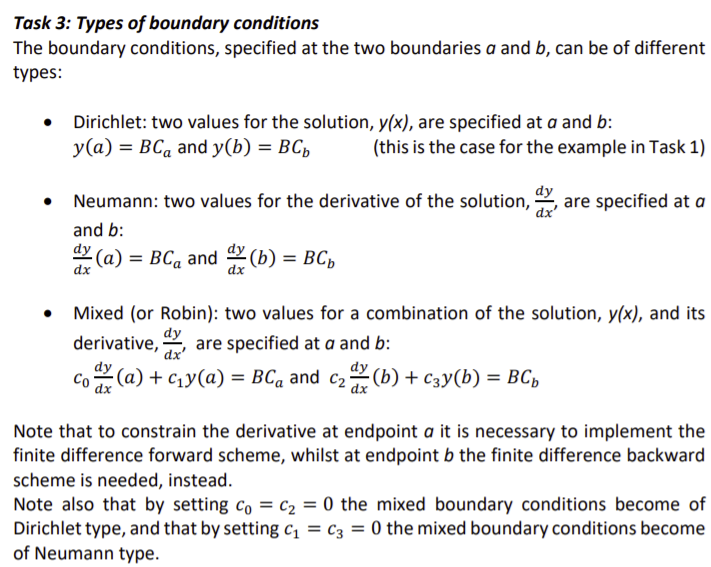

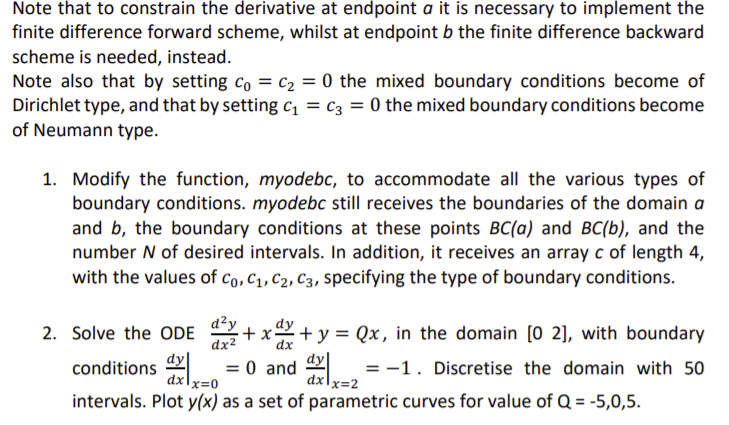

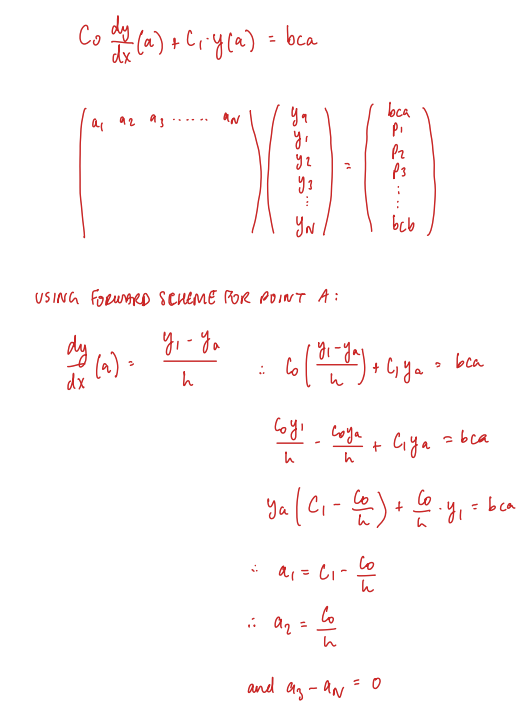

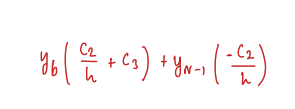
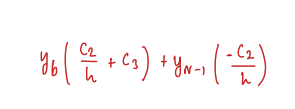

In [10]:
def f(x):
    return x

def g(x):
    return 1

def q1(x):
    return 5*x

def q2(x):
    return 0

def q3(x):
    return -5 * x

#this is for Task 4
def q4(x):
    return ((-10**8)*(np.exp(-x/0.015)))/(x*16.75)

def myodebc_dynamic(a,b,bca,bcb,N,c,q=q1):
    
    #check we have values for c1,c2,c3,c4
    if len(c) == 4:
        
        x = np.linspace(a,b,N+1)
    
        #create matrics: Ay = p
        A = np.zeros((N+1, N+1))
        b = np.zeros(N+1)
        
        #equidistant nodes
        h = x[1] - x[0]

        #input boundary conditions into matrices
        #to constrain derivative at a, we use finite difference forward scheme
        #to constrain derivative at b, we use finite difference backward scheme
        
        #boundary a (check image above to show what's going on below)
        A[0,0] = c[1] - c[0]/h
        A[0,1] = c[0]/h
        b[0] = bca
    
        # boundary b (check image above to show what's going on below)
        A[N,N-1] = -c[2]/h
        A[N,N] = c[2]/h + c[3]
        b[N] = bcb
        

        for i in range(1,N):

            h = x[i] - x[i-1]

            A[i,i-1] = (1/(h**2)) - (f(x[i]))/(2*h)
            A[i,i] = (g(x[i]) - (2/(h**2)))
            A[i,i+1] = (1/(h**2)) + ((f(x[i]))/(2*h))
            
            if q == 'q1':
                b[i] = q1(x[i])
            elif q == 'q2':
                b[i] = q2(x[i])
            elif q == 'q3':
                b[i] = q3(x[i]) 
            elif q == 'q4':
                b[i] = q4(x[i])
        
        y = MyGauss(A,b)      

        return (x,y)
        
        

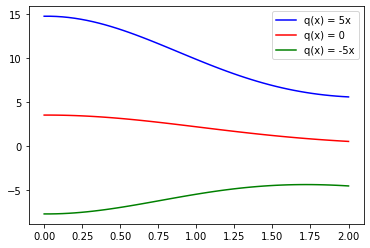

In [11]:
(x1,y1) = myodebc_dynamic(0,2,0,-1,50,[1,0,1,0], q='q1')
(x2,y2) = myodebc_dynamic(0,2,0,-1,50,[1,0,1,0], q='q2')
(x3,y3) = myodebc_dynamic(0,2,0,-1,50,[1,0,1,0], q='q3')
plt.plot(x1,y1,'b', label='q(x) = 5x')
plt.plot(x2,y2,'r', label='q(x) = 0')
plt.plot(x3,y3,'g', label='q(x) = -5x');
plt.legend();

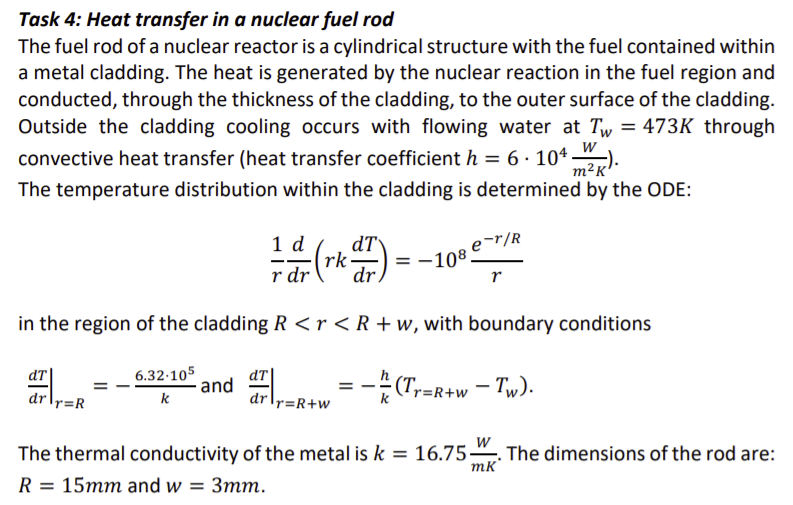

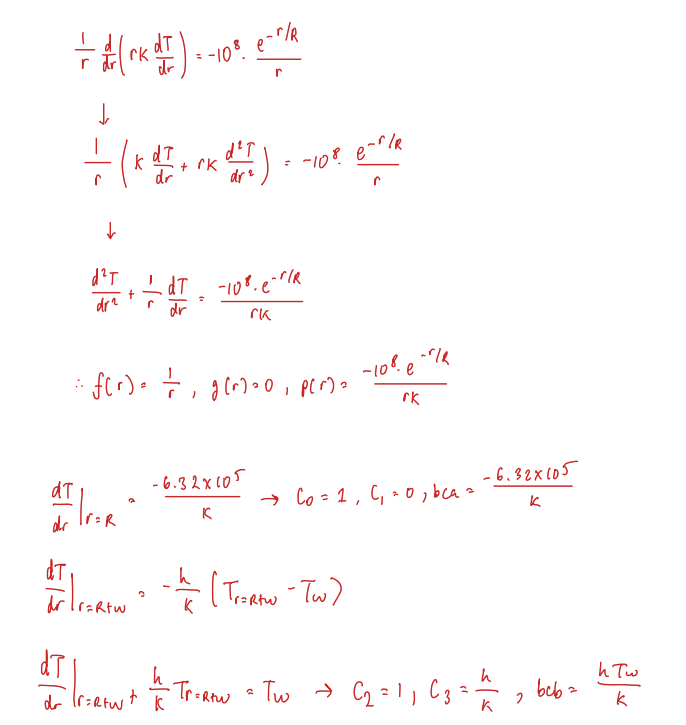

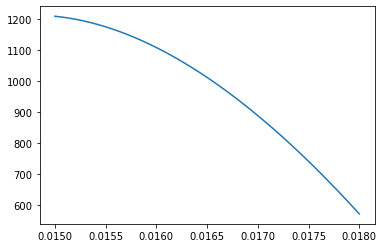

In [12]:
def f(r):
    return 1/r

def g(r):
    return 0

R = 0.015
w = 0.003
k = 16.75
Tw = 473
h = 6*10**4
N = 50

#Neumann Boundary conditions
c0 = 1
c1 = 0
c2 = 1
c3 = h/k
c = [c0,c1,c2,c3]

bca = -6.32*10**5 / k
bcb = (Tw*h)/k

#programmed q function in Task 4 FOR Q(x)
(T,r) = myodebc_dynamic(R,R+w, bca,bcb,N, c,q='q4')

plt.plot(T,r);

## Task 5

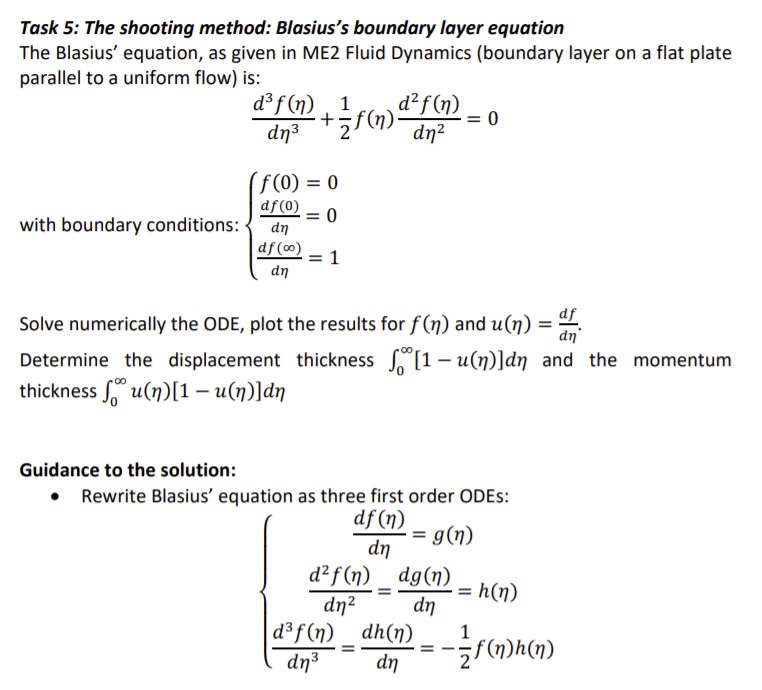

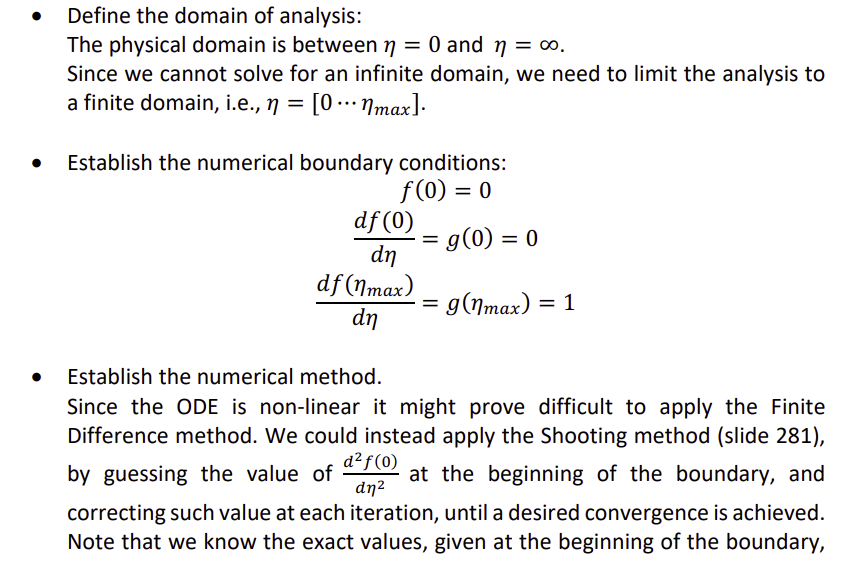

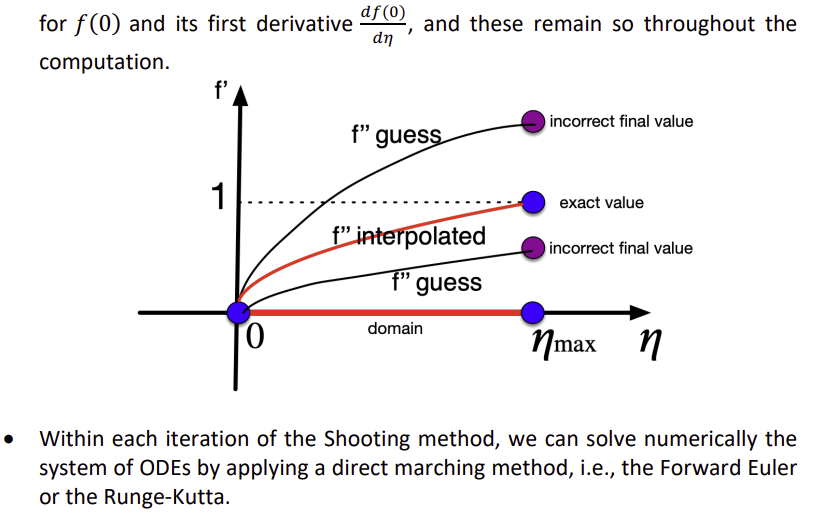

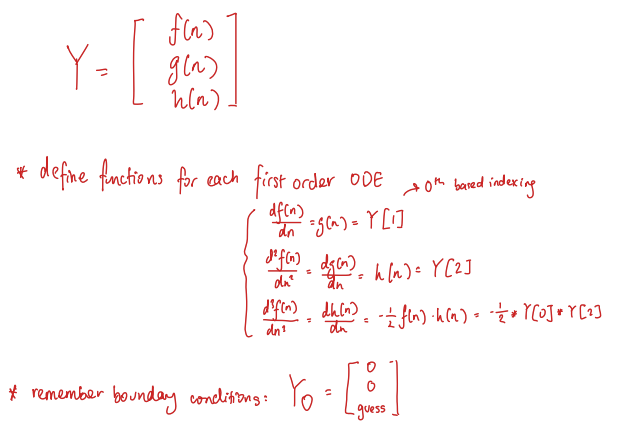

In [13]:
#REWRITE BLASIUS EQUATOIN AS 3 FIRST ORDER ODES

# y = [f(n), g(n), h(n)]

def func1(t,y):
    return y[1]

def func2(t,y):
    return y[2]

def func3(t,y):
    return -0.5*y[0]*y[2]


# Forward Euler is the numerical method we will use
def FwdEuler(Y0,t0,tend,h):
    
    # Y0 = [f(0), g(0), h(0)]
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    
    # determine the number of time steps
    N = len(t)
    
    # allocate output array with
    #Y[0,:] containing all solutions for f(n)
    #Y[1,:] containing all solutions for g(n)
    #Y[2,:] containing all solutions for h(h)
    Y = np.ndarray((3,N))
    
    # initialise the solution
    t[0] = t0
    Y[0,0] = Y0[0]
    Y[1,0] = Y0[1]
    Y[2,0] = Y0[2]
    
    # compute the solution incrementally at subsequent time steps
    #using Forward Euler method
    for n in range(1,N):
        Y[0,n] = Y[0,n-1] + func1(t[n-1],Y[:,n-1]) * h
        Y[1,n] = Y[1,n-1] + func2(t[n-1],Y[:,n-1]) * h
        Y[2,n] = Y[2,n-1] + func3(t[n-1],Y[:,n-1]) * h
        
    return (t,Y)

In [14]:
# Lagrangian interpolation functions, copied and pasted from Session 4

# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L


def LagInterp(xn,yn,x):
    N = len(xn)
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    y = np.ndarray(len(x))
    # interpolate for all the values of x in the interpolating range
    for i in range(len(x)):
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,x[i])
        # add the curren value of yp to the list of y
        y[i] = yp
    return y

In [46]:
Nitmax = 1000 # we need to stop iteration if they become too large: the solution is diverging
Nit = 0

#set boundary conditions

#create array for initial boundary conditions
Y0 = np.ndarray(3)

#f(0) = 0
Y0[0] = 0
#g(0) = 0
Y0[1] = 0
#h(0) = guess; we'll go with 0 
Y0[2] = 1

#we also know final velocity is 0 - g(final) = 1
gfinal = 1

#set the domain
eta0 = 0 # lower boundary
etamax = 10 # upper boundary
Deta = (etamax-eta0)/1000  # eta step

#set variables to store previous values of h and g
h_old = 0
g_old = 0


tol = 1.0e-5
#initialise an error to start while loop 
error = 100

# After every while loop, we get a better Y0, more specifically a better initial value for h, which gets us
# close enough to gfinal which we know is 1 (given in the question)

while (error > tol) and (Nit < Nitmax):
    
    Nit += 1
    
    #within each iteration solve system of ODEs by applying direct marching methid (Fwd Euler in this case)
    (eta,Y) = FwdEuler(Y0,eta0,etamax,Deta)
    
    #update value of h(n) and g(n) by interpolating against values of gfinal and ginitial
    #create array containing previous g value (g_old) and the value just computed using the FwdEuler function (Y[1,-1]) 
    g = np.array([g_old,Y[1,-1]])
    #create array containing previous h value (h_old) and the value just computed Y0[2] - for the first loop
    #Y0[2] is replaced by the value we get from interpolating
    h = np.array([h_old,Y0[2]])
    
    #update guess for h(0) using Lagrangian Interpolation - 'hint' will be the h coordinate 
    hint = LagInterp(g,h,np.array([gfinal]))

    #update g_old and h_old with current values
    g_old = Y[1,-1]
    h_old = Y0[2]
    
    Y0[2] = hint[0]
    
    #now calculate error between computed gfinal to actual gfinal
    error = abs(Y[1,-1] - gfinal)
    
print('Iterations needed: '+str(Nit))

Iterations needed: 6


d99: 4.92   d1: 1.7268833654847116   d2: 0.6656019785179426


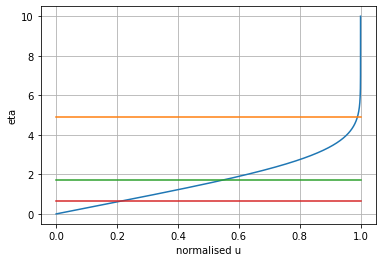

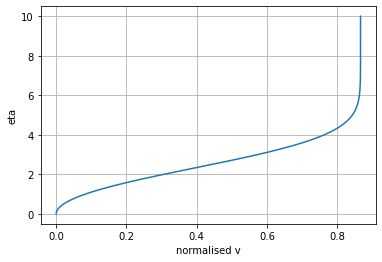

In [43]:
# Numerical integration with Trapezium rule, copied and pasted from Session 3

def trapz(x,y):
    # get the number of subintervals
    N = len(x) - 1
    # compute the integral
    # set range for the trapezia: there are as many trapezia as the number of intervals
    R = range(0,N)
    S = 0
    for i in R:
        # compute the area of this single trapezium (remind yourself the area of a trapezium)
        S += 0.5 * (y[i+1] + y[i]) * (x[i+1] - x[i])
    return S


f = Y[0,:]  # displacement
u = Y[1,:]  # velocity
v = 0.5*(eta*u-f) 

# calculate thicknesses
diff = abs(u-0.99*max(u))
# argmin() returns the indices of the lowest value in an array
eta99 = diff.argmin()
# displacement thickness delta1 = int 0->infinity of 1-u(eta)
d1 = trapz(eta,max(u)-u)
# momentum thickness delta2 = int 0->infinity of u(eta)*(1-u(eta))
d2 = trapz(eta,u*(max(u)-u))
print('d99: '+str(eta[eta99])+'   d1: '+str(d1)+'   d2: '+str(d2))

# plot u and thicknesses
plt.plot(u,eta)
plt.grid()
plt.plot([0,max(u)],[eta[eta99],eta[eta99]])
plt.plot([0,max(u)],[d1,d1])
plt.plot([0,max(u)],[d2,d2])
plt.xlabel('normalised u')
plt.ylabel('eta')
plt.show()

# plot v
plt.plot(v,eta)
plt.grid()
plt.xlabel('normalised v')
plt.ylabel('eta')
plt.show()